# Example Image Captioning with `ClipCap`

Note : the warnings in the below cells are normal, they are due to weights convertion from the `pytorch` checkpoints to my `tensorflow` implementation.

Possible issue : `RuntimeError : NumPy module is not available`, when transferring weights from `pytorch`. Try to run `pip install --upgrade numpy`, and it should solve the issue.

In [1]:
import os
import numpy as np
import tensorflow as tf

from loggers import set_level
from models import get_pretrained
from utils import normalize_filename, plot
from utils.image import display_image, load_image
from models.siamese import CLIP
from models.image_captioning import ClipCap

model_name = 'clip_cap'

print('Tensorflow version : {}'.format(tf.__version__))

Tensorflow version : 2.10.0


In [2]:
model = CLIP(
    nom  = 'clip_rn50x4',
    lang = 'en',
    input_size   = 288,
    text_encoder = 'clip',
    pretrained   = 'RN50x4',
    normalize = True
)

When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners
Initializing model with kwargs : {'comparator': {'architecture_name': 'clip', 'normalize': True, 'distance_metric': 'dp', 'pretrained_name': 'RN50x4'}}
Weights transfered successfully !
Variable text_encoder/sos_token:0 from layer text_encoder/sos_token:0 does not have any mapping : re-using its current weights
Variable text_encoder/eos_token:0 from layer text_encoder/eos_token:0 does not have any mapping : re-using its current weights
Variable text_encoder/pad_token:0 from layer text_encoder/pad_token:0 does not have any mapping : re-using its current weights
Weights transfered successfully !
Initializing submodel : `comparator` !
Submodel comparator saved in pretrained_models\clip_rn50x4\saving\comparator.json !
Model clip_rn50x4 initialized successfully !


In [4]:
model = ClipCap(nom = model_name, lang = 'en', pretrained = 'transformer')
print(model)

Using pad_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using mask_token, but it is not set yet.


When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners
Loading pretrained weights from pretrained_models\pretrained_weights\transformer_weights.pt
Weights transfered successfully !
Variable generator/sos_token:0 from layer generator/sos_token:0 does not have any mapping : re-using its current weights
Variable generator/eos_token:0 from layer generator/eos_token:0 does not have any mapping : re-using its current weights
Variable generator/pad_token:0 from layer generator/pad_token:0 does not have any mapping : re-using its current weights
Weights transfered successfully !
Initializing model with kwargs : {'model': <custom_architectures.transformers_arch.clip_cap_arch.ClipCap object at 0x000001FC500316F0>}
Initializing submodel : `model` !
Submodel model saved in pretrained_models\clip_cap\saving\model.json !
Model clip_cap initialized successfully !

========== clip_cap ==========
Sub model model
- Inputs 	: unknown
- Outputs 	: unknown
- Numbe

## Model initialization

In [2]:
model = get_pretrained(model_name)

print(model)

When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners
Model restoration...
Initializing submodel : `model` !
Successfully restored model from pretrained_models/clip_cap/saving/model.json !
Model clip_cap initialized successfully !

========== clip_cap ==========
Sub model model
- Inputs 	: unknown
- Outputs 	: unknown
- Number of layers 	: 2
- Number of parameters 	: 181.960 Millions
- Model not compiled

Transfer-learning from : transformer
Already trained on 0 epochs (0 steps)

- Language : en
- Vocabulary (size = 50257) : ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ...]
- Embedding's dim : 640
- Encoder's name : clip_rn50x4



## Prediction

2 inference's methods are supported : *greedy* and *Beam-Search (BS) based* inference. By default, the mode is greedy as it is faster but it will probably be modified in future version as the BS-based inference give better results !

To change the mode, simply pass `method = 'beam'` as kwarg to the `predict` method (see the 3rd cell below for example). As you can see, the prediction's quality is much better in the `BS-based` method !

lena.jpg
Embedding key embedding is not in data, embedding it !
When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners
Model restoration...
Initializing submodel : `comparator` !
Successfully restored comparator from pretrained_models/clip_rn50x4/saving/comparator.json !
Model clip_rn50x4 initialized successfully !
Caption : A woman in a hat and a hat with a bow is standing in front of a window.                               


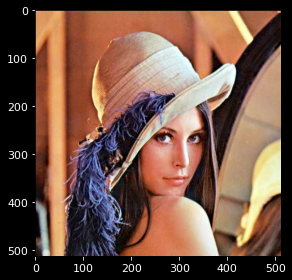

In [3]:
set_level('info') # set to 'time' to have the performances

img_dir  = ''
if img_dir: filename = os.path.join(img_dir, np.random.choice(os.listdir(img_dir)))
else:       filename = 'lena.jpg'

print(filename)
out = model.predict(filename, max_length = 50, save = False)

lena.jpg
Embedding key embedding is not in data, embedding it !
Captions :
- A picture of a woman with a hat on.                                        


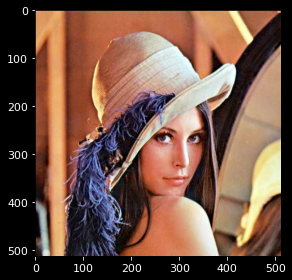

Timers for logger timer :
- predict : 4.095 sec
  - post_process executed 2 times : 192 ms (96 ms / exec)
    - load_image : 2 ms
  - embed : 204 ms
    - processing executed 2 times : 19 ms (9 ms / exec)
      - load_image : 10 ms
    - encoding : 184 ms
      - MHA call : 8 ms
        - process_qkv : 5 ms
          - split_heads executed 3 times : 2 ms (0 ms / exec)
        - scaled_dot_product_attention : 0 ms
          - compute_attention : 0 ms
        - merge_heads : 0 ms
  - inference : 3.697 sec
    - infer : 3.697 sec
      - Transformer block call : 365 ms
        - build_mask executed 9 times : 2 ms (0 ms / exec)
        - layer call executed 8 times : 358 ms (44 ms / exec)
          - MHA call executed 8 times : 260 ms (32 ms / exec)
            - process_qkv executed 8 times : 164 ms (20 ms / exec)
              - split_heads executed 24 times : 37 ms (1 ms / exec)
            - scaled_dot_product_attention executed 8 times : 37 ms (4 ms / exec)
              - compute_att

In [6]:
set_level('time') # set to 'time' to have the performances

img_dir  = ''
if img_dir: filename = os.path.join(img_dir, np.random.choice(os.listdir(img_dir)))
else:       filename = 'lena.jpg'

print(filename)
out = model.predict(filename, max_length = 50, save = False, method = 'beam', num_beams = 10, num_sentences = 1)